### VQE for H2 molecule
Exchange packages Qiskit to QLM to Cirq

In this notebook we use 3 quantum programming languages, Qiskit, QLM and Cirq to calculate the ground state energy of $H_{2}$ molecule.

We also make use of the myQLM library to exchange between the programming languages packages.

We start with qiskit then qlm and finally cirq.

### Outline
<ol>
    <li>Building the hamiltonian</li>
    <li>Energy calculation using Qiskit</li>
    <li>Energy calculation using QLM</li>
    <li>Energy calculation using Cirq</li>
    <li>Conclusion</li>
    <li>References</li>
</ol>

### Building the hamiltonian
<hr>

The hamiltonian is the equation describing the energy of the system. In other words describing the energy of the h2 molecule system in our case.

The are many ways to get the hamiltonian, one of which is from this link: https://pennylane.ai/qml/demos/tutorial_vqe
,then using qiskit operators to build the hamiltonian manually.

In [4]:
from qiskit.opflow import X, Y, Z, I
from qiskit.quantum_info.operators import Operator, Pauli

In [5]:
H2_op = (-0.24274280046588792)*Operator(Pauli('IIZI')) + (-0.24274280046588792)*Operator(Pauli('IIIZ')) + (-0.04207898539364302)*Operator(Pauli('IIII')) + (0.17771287502681438)*Operator(Pauli('ZIII')) + (0.1777128750268144)*Operator(Pauli('IZII')) + (0.12293305045316086)*Operator(Pauli('ZIZI')) + (0.12293305045316086)*Operator(Pauli('IZIZ')) + (0.16768319431887935)*Operator(Pauli('ZIIZ')) + (0.16768319431887935)*Operator(Pauli('IZZI')) + (0.1705973836507714)*Operator(Pauli('ZZII')) + (0.1762764072240811)*Operator(Pauli('IIZZ')) + (-0.044750143865718496)*Operator(Pauli('YYXX')) + (-0.044750143865718496)*Operator(Pauli('XXYY')) + (0.044750143865718496)*Operator(Pauli('YXXY')) + (0.044750143865718496)*Operator(Pauli('XYYX'))

In [6]:
H2_op

Operator([[ 0.75596744+0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j],
          [ 0.        +0.j,  0.30766774+0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.30766774+0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            

### Energy calculation using Qiskit
<hr>

We first build the ansatz and choose the optimizer, in our case SLSQP.

In [7]:
from qiskit_algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal

num_qubits = 4
ansatz = TwoLocal(num_qubits, "ry", "cz")
optimizer = SLSQP(maxiter=100)

C:\Users\lenovo\anaconda3\envs\openvqe3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


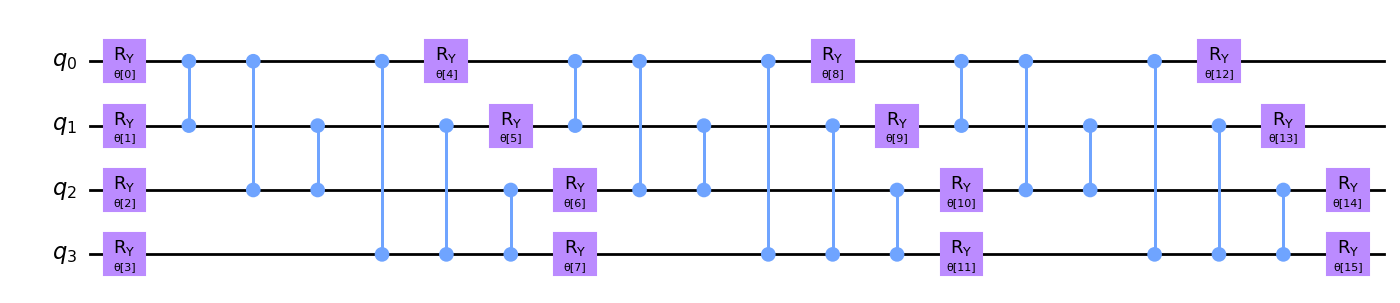

In [8]:
ansatz.decompose().draw("mpl")

We implement a function to store the values at each iteration.

In [10]:
counts = []
values = []


def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

Now we build the VQE and estimator class to calculate the ground state energy of $H_{2}$ .

In [11]:
from qiskit.primitives import Estimator

estimator = Estimator()

In [12]:
from qiskit_algorithms import VQE

vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)

We now run vqe and we get a value -1.1362 Ha same as that in the pennylane tutorial which means our implementation is correct.

In [13]:
result = vqe.compute_minimum_eigenvalue(H2_op)
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 444,
    'eigenvalue': -1.1361890970610535,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x0000021ECE5939B0>,
    'optimal_parameters': {   ParameterVectorElement(θ[1]): -3.1407177005420617,
                              ParameterVectorElement(θ[3]): 1.3478176242639133,
                              ParameterVectorElement(θ[2]): 6.283154078910516,
                              ParameterVectorElement(θ[0]): -3.142240153182761,
                              ParameterVectorElement(θ[4]): 4.7123855614915735,
                              ParameterVectorElement(θ[5]): 4.712459269535155,
                              ParameterVectorElement(θ[6]): -1.5695530577770906,
                              ParameterVectorElement(θ[7]): -1.130182623471051,
                              ParameterVectorElement(θ[8]): -0.776700046176696,
                              ParameterVectorElement(θ[9]): 3.91264

The goal of this notebook is to show how we can exchange between packages, so we will not use noise in the circuit as this can increase running time a lot and is not relevant to our situation.

Text(0.5, 1.0, 'Convergence with no noise')

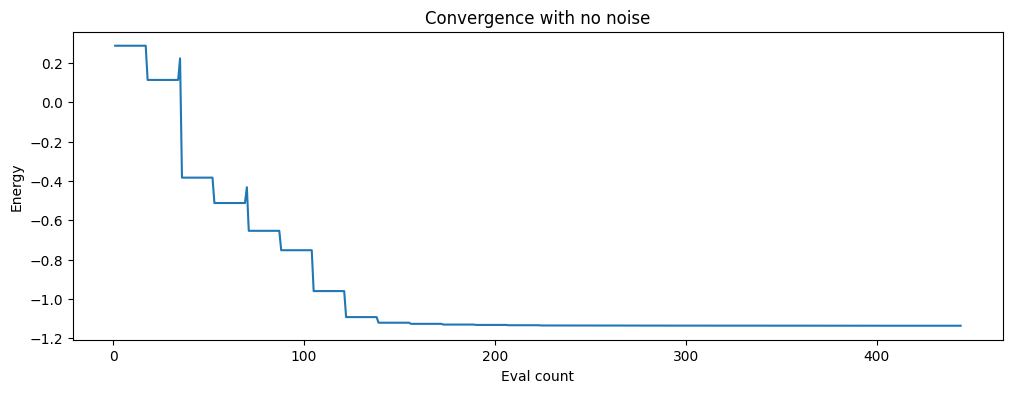

In [14]:
import pylab

pylab.rcParams["figure.figsize"] = (12, 4)
pylab.plot(counts, values)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Convergence with no noise")

### Energy calculation using QLM
<hr>

First we need to change the circuit from Qiskit to QLM

In [15]:
from qat.lang import *
from qat import *
from qat.interop.qiskit import qiskit_to_qlm

qlm_circuit = qiskit_to_qlm(ansatz.decompose())

using legacy validation callback


In [16]:
qlm_circuit().display()

After successfully changing the circuit, we can now find the parameters present in it.

In [17]:
qlm_circuit.get_variables()

['θ[0]',
 'θ[10]',
 'θ[11]',
 'θ[12]',
 'θ[13]',
 'θ[14]',
 'θ[15]',
 'θ[1]',
 'θ[2]',
 'θ[3]',
 'θ[4]',
 'θ[5]',
 'θ[6]',
 'θ[7]',
 'θ[8]',
 'θ[9]']

Now we build the hamiltonion for $H_{2}$ manually the same as the one in Qiskit, since myQLM library supports changing circuit between packages and not changing hamiltonian.

In [18]:
from qat.core import Observable, Term

my_observable = Observable(4, # A 4 qubits observable
                           pauli_terms=[
                               Term(-0.24274280046588792, 'IIZI', [0, 1, 2, 3]),
                               Term(-0.24274280046588792, 'IIIZ', [0, 1, 2, 3]),
                               Term(-0.04207898539364302, 'IIII', [0, 1, 2, 3]),
                               Term(0.17771287502681438, 'ZIII', [0, 1, 2, 3]),
                               Term(0.1777128750268144, 'IZII', [0, 1, 2, 3]),
                               Term(0.12293305045316086, 'ZIZI', [0, 1, 2, 3]),
                               Term(0.12293305045316086, 'IZIZ', [0, 1, 2, 3]),
                               Term(0.16768319431887935, 'ZIIZ', [0, 1, 2, 3]),
                               Term(0.16768319431887935, 'IZZI', [0, 1, 2, 3]),
                               Term(0.1705973836507714, 'ZZII', [0, 1, 2, 3]),
                               Term(0.1762764072240811, 'IIZZ', [0, 1, 2, 3]),
                               Term(-0.044750143865718496, 'YYXX', [0, 1, 2, 3]),
                               Term(-0.044750143865718496, 'XXYY', [0, 1, 2, 3]),
                               Term(0.044750143865718496, 'YXXY', [0, 1, 2, 3]),
                               Term(0.044750143865718496, 'XYYX', [0, 1, 2, 3])
                           ],
                           constant_coeff=0)
print(my_observable)

-0.04207898539364302 * I^4 +
-0.24274280046588792 * (Z|[2]) +
-0.24274280046588792 * (Z|[3]) +
0.17771287502681438 * (Z|[0]) +
0.1777128750268144 * (Z|[1]) +
0.12293305045316086 * (ZZ|[0, 2]) +
0.12293305045316086 * (ZZ|[1, 3]) +
0.16768319431887935 * (ZZ|[0, 3]) +
0.16768319431887935 * (ZZ|[1, 2]) +
0.1705973836507714 * (ZZ|[0, 1]) +
0.1762764072240811 * (ZZ|[2, 3]) +
-0.044750143865718496 * (YYXX|[0, 1, 2, 3]) +
-0.044750143865718496 * (XXYY|[0, 1, 2, 3]) +
0.044750143865718496 * (YXXY|[0, 1, 2, 3]) +
0.044750143865718496 * (XYYX|[0, 1, 2, 3])


Now we can minimize the cost function, by other means minimizing the circuit expectation value according to my_observable. We can see that we get approximately same energy of -1.1362 Ha.

For one of the optimizers we got approximately same value, for the other we got near but not approximately the same but for Nelder-mead we got a far value.

In [25]:
from qat.qpus import get_default_qpu
from qat.plugins import ScipyMinimizePlugin
import numpy as np

nqbits = 4
job = qlm_circuit.to_job(job_type="OBS",
                  observable=my_observable,
                  nbshots=0)

theta_0 = np.random.random(size=nqbits*4)

linalg_qpu = get_default_qpu()
methods = ["COBYLA", "Nelder-Mead", "BFGS"]
result = {}
for method in methods:
    optimizer_scipy = ScipyMinimizePlugin(method=method,
                                          tol=1e-6,
                                          options={"maxiter": 200},
                                          x0=theta_0)
    qpu = optimizer_scipy | linalg_qpu
    result[method] = qpu.submit(job)

    print("Minimum VQE energy (%s) = %s"%(method, result[method].value))

Minimum VQE energy (COBYLA) = -1.1298140004918207
Minimum VQE energy (Nelder-Mead) = -0.2772109342423198
Minimum VQE energy (BFGS) = -1.1361894507710917


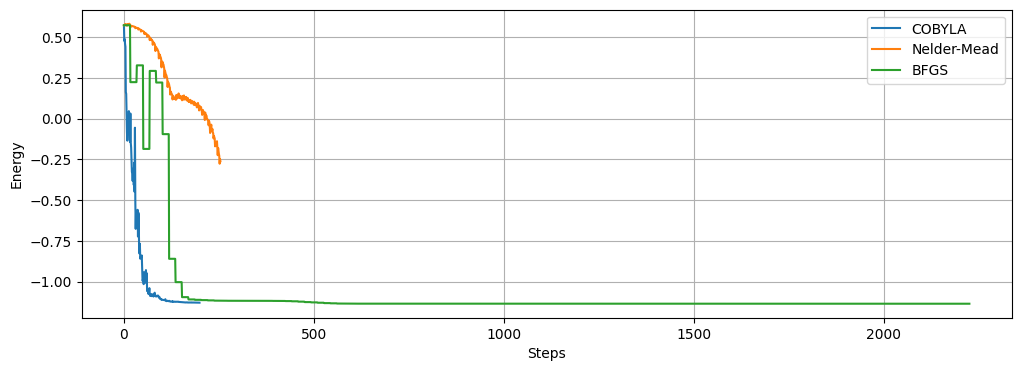

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
for method in methods:
    plt.plot(eval(result[method].meta_data['optimization_trace']),
             label=method)
plt.grid()
plt.legend(loc="best")
plt.xlabel("Steps")
plt.ylabel("Energy");

### Energy calculation using cirq
<hr>

First we need to change the circuit into type cirq instead of QLM type.

In [27]:
from qat.interop.cirq import qlm_to_cirq
cirq_circuit = qlm_to_cirq(qlm_circuit)
print(cirq_circuit)

                         ┌──┐                                        ┌──┐                                         ┌──┐
1: ───Ry(θ[0])───@───@─────@────Ry(θ[4])──────────────@──────────@─────@────Ry(θ[8])──────────────@───────────@─────@────Ry(θ[12])───M───────────────────────────
                 │   │     │                          │          │     │                          │           │     │
2: ───Ry(θ[1])───@───┼────@┼────@──────────Ry(θ[5])───@──────────┼────@┼────@──────────Ry(θ[9])───@───────────┼────@┼────@───────────Ry(θ[13])───M───────────────
                     │    ││    │                                │    ││    │                                 │    ││    │
3: ───Ry(θ[2])───────@────@┼────┼──────────@──────────Ry(θ[6])───@────@┼────┼──────────@──────────Ry(θ[10])───@────@┼────┼───────────@───────────Ry(θ[14])───M───
                           │    │          │                           │    │          │                            │    │           │
4: ───Ry(θ[3])─────

Cirq uses the concept of a sweep in which the values of the parameters are chosen randomly in each iteration instead of using an optimizer.

We now define 2 arrays for storing the energies and parameters.

In [28]:
import random
energies = []
random_params = []

Now we define the simulator in cirq.

In [29]:
import cirq

simulator = cirq.Simulator()

Now we define the observable

In [30]:
q1 = cirq.LineQubit(1)
q2 = cirq.LineQubit(2)
q3 = cirq.LineQubit(3)
q4 = cirq.LineQubit(4)

pauli_terms=[
                -0.24274280046588792*cirq.Z(q3),
                -0.24274280046588792*cirq.Z(q4),
                -0.04207898539364302*cirq.I(q1)*cirq.I(q2)*cirq.I(q3)*cirq.I(q4),
                0.17771287502681438*cirq.Z(q1),
                0.1777128750268144*cirq.Z(q2),
                0.12293305045316086*cirq.Z(q1)*cirq.Z(q3),
                0.12293305045316086*cirq.Z(q2)*cirq.Z(q4),
                0.16768319431887935*cirq.Z(q1)*cirq.Z(q4),
                0.16768319431887935*cirq.Z(q2)*cirq.Z(q3),
                0.1705973836507714*cirq.Z(q1)*cirq.Z(q2),
                0.1762764072240811*cirq.Z(q3)*cirq.Z(q4),
                -0.044750143865718496*cirq.Y(q1)*cirq.Y(q2)*cirq.X(q3)*cirq.X(q4),
                -0.044750143865718496*cirq.X(q1)*cirq.X(q2)*cirq.Y(q3)*cirq.Y(q4),
                0.044750143865718496*cirq.Y(q1)*cirq.X(q2)*cirq.X(q3)*cirq.Y(q4),
                0.044750143865718496*cirq.X(q1)*cirq.Y(q2)*cirq.Y(q3)*cirq.X(q4)
                           ]

observable = sum(pauli_terms)

Now we perform 1000 iterations of sweep.

In [31]:
for i in range(1000):
    # Generate a list of 16 random values between -1 and 1
    x = [2 * random.random() - 1 for _ in range(16)]
    resolver = cirq.ParamResolver({'θ[0]': x[0], 'θ[1]': x[1], 'θ[2]': x[2], 'θ[3]': x[3], 'θ[4]': x[4], 'θ[5]': x[5], 'θ[6]': x[6], 'θ[7]': x[7], 'θ[8]': x[8], 'θ[9]': x[9], 'θ[10]': x[10], 'θ[11]': x[11], 'θ[12]': x[12], 'θ[13]': x[13], 'θ[14]': x[14], 'θ[15]': x[15]})
    resolved_circuit = cirq.resolve_parameters(cirq_circuit, resolver)

    #XX_obs = cirq.X(cirq.LineQubit(3)) * cirq.Z(cirq.LineQubit(4))
    ev_list = simulator.simulate_expectation_values(
        cirq.Circuit(resolved_circuit), observables=[observable], permit_terminal_measurements=True
    )
    energies.append(ev_list[0].real)
    random_params.append(x)

In [32]:
print("The minimum energy found is ", min(energies))

The minimum energy found is  -1.1173490350482758


### Conclusion:
<hr>
We can clearly see that we were able to find a good approximation for the ground state energy using 3 quantum programming languages. Exchange packages is very important and can be revolutionary due to the following reasons:
<ul>
    <li>We have the code written in one language but we need to use the features in another langauge, for example error correction features in qiskit, then we can change the circuit from cirq to qiskit for example.</li>
    <li>If the circuits needed to change are very big, we cannot do that manually, then myQLM library can automate this.</li>
    <li>If a research group has access to google quantum computer but his circuit is in qiskit, then myQLM can be used to change the circuit to cirq and run successfully on google quantum computer.</li>
</ul>

### References:
<hr>
<ol>
    <li>QLM VQE tutorial: <a href="https://notebooks.gesis.org/binder/jupyter/user/myqlm-myqlm-notebooks-fywdbybe/notebooks/tutorials/variational_algorithms/vqe_getting_started_random_spin.ipynb">link</a></li>
    <li>Pennylane VQE tutorial and H2 hamiltonian: <a href="https://pennylane.ai/qml/demos/tutorial_vqe">link</a></li>
    <li>Qiskit Operators: <a href="https://qiskit-org-web-resources.s3.us.cloud-object-storage.appdomain.cloud/documentation/stable/0.19/tutorials/circuits_advanced/2_operators_overview.html">link</a></li>
    <li>Qiskit VQE: <a href="https://qiskit-community.github.io/qiskit-algorithms/tutorials/03_vqe_simulation_with_noise.html">link</a></li>
</ol>